## More than Outliers

The Stats 101 approach to data inspection is to take a look at your variables via some box-and-whisker plot, finding your outliers by examining whether they fall in or out of 1.5 times your IQR. Like so

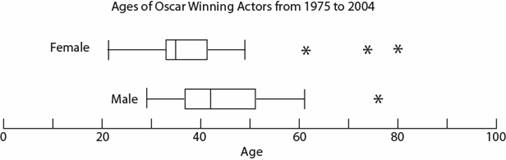

In [1]:
from IPython.display import Image
Image('./images/box_whisker.jpg')

This would alert us to points we'd consider dropping if our results look funny, but how do we describe the impact of these points on our models?

For this, we'll extend our data point consideration into two dimensions and I'll borrow some graphics from [YouTube user jbstatistics](https://www.youtube.com/watch?v=xc_X9GFVuVU).

Looking at the point labeled `Outlier 1`, it's clear that there's a good distance between it and all other points. However, looking at the line of best fit when trained with and without the point, there's negligible difference.

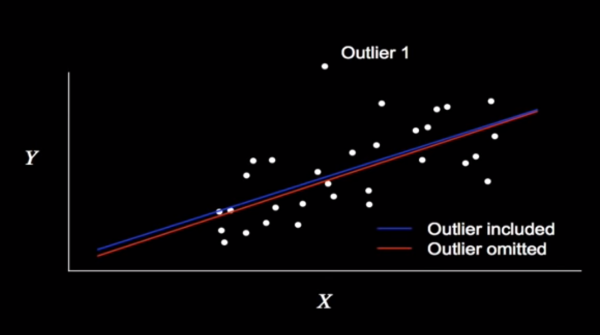

In [2]:
Image('./images/leverage_1.PNG')

By contrast, consider the point `Outlier 2`, which pivots the line by like 20° in and out of the model.

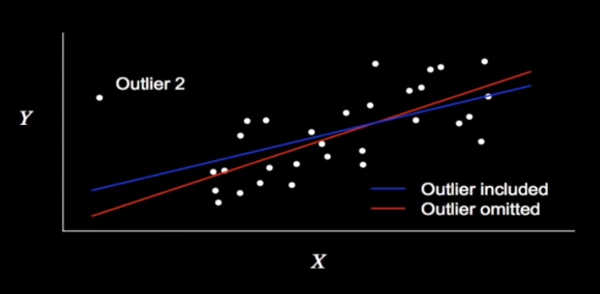

In [3]:
Image('./images/leverage_2.PNG')

In this case, we can say that `Outlier 2` has greater *Influence* than `Outlier 1`.

Furthermore, `Outlier 2` boasts greater *Leverage* over `Outlier 1`, as it's futher from the mean value for `X` (the leverage in physics is immediately applicable here).

### Too Many Cook's

These concepts come with concrete mathematical definitions which can be calculated and subsequently visualized.

Using these measures we can calculate the [Cook's Distance](https://en.wikipedia.org/wiki/Cook%27s_distance) for each point `i`, or "as the sum of all the changes in the regression model when observation `i` is removed from it"

Go figure, our new, whizbang library, `yellowbrick` comes with a plotting function that handles all of that under the hood.

In [4]:
%pylab inline

from warnings import filterwarnings
filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


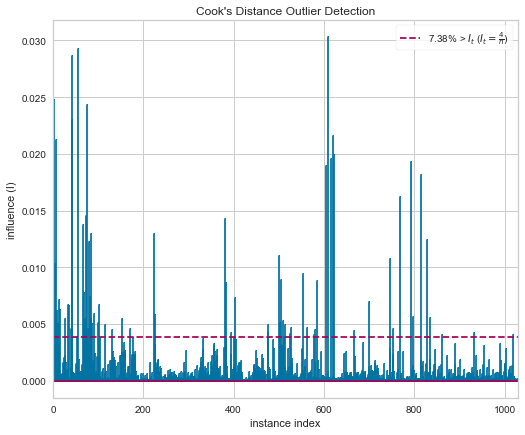

In [5]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance(size=(600, 500))
visualizer.fit(X, y);
visualizer.poof();

Looking at the plot, it's immediately obvious that this isn't a slow-pitch Linear Regression dataset.